# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1086.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.10e-42
Time:                        13:14:06   Log-Likelihood:                 2.9983
No. Observations:                  50   AIC:                             2.003
Df Residuals:                      46   BIC:                             9.651
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8291      0.081     59.633      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.28407463  4.80984275  5.29140797  5.69790032  6.00959063  6.221132
  6.34243828  6.3970552   6.41829195  6.44374852  6.50913815  6.64241973
  6.85920426  7.16018998  7.53104767  7.94477488  8.36613239  8.75743387
  9.08473767  9.32342334  9.46223665  9.50513871  9.4706551   9.38883221
  9.29630067  9.23025708  9.22235268  9.29349317  9.45040393  9.68452509
  9.97341788 10.28445125 10.58016306 10.82441501 10.98833008 11.05503689
 11.02244167 10.90357224 10.72443757 10.5197546  10.32724433 10.18143435
 10.10798611 10.11947875 10.21334242 10.3722805  10.56711138 10.7615629
 10.91823178 11.00472889]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.98387171 10.81387172 10.51694217 10.1437043   9.76079344  9.43454439
  9.21475036  9.1224718   9.14488013  9.23839858]


## Plot comparison

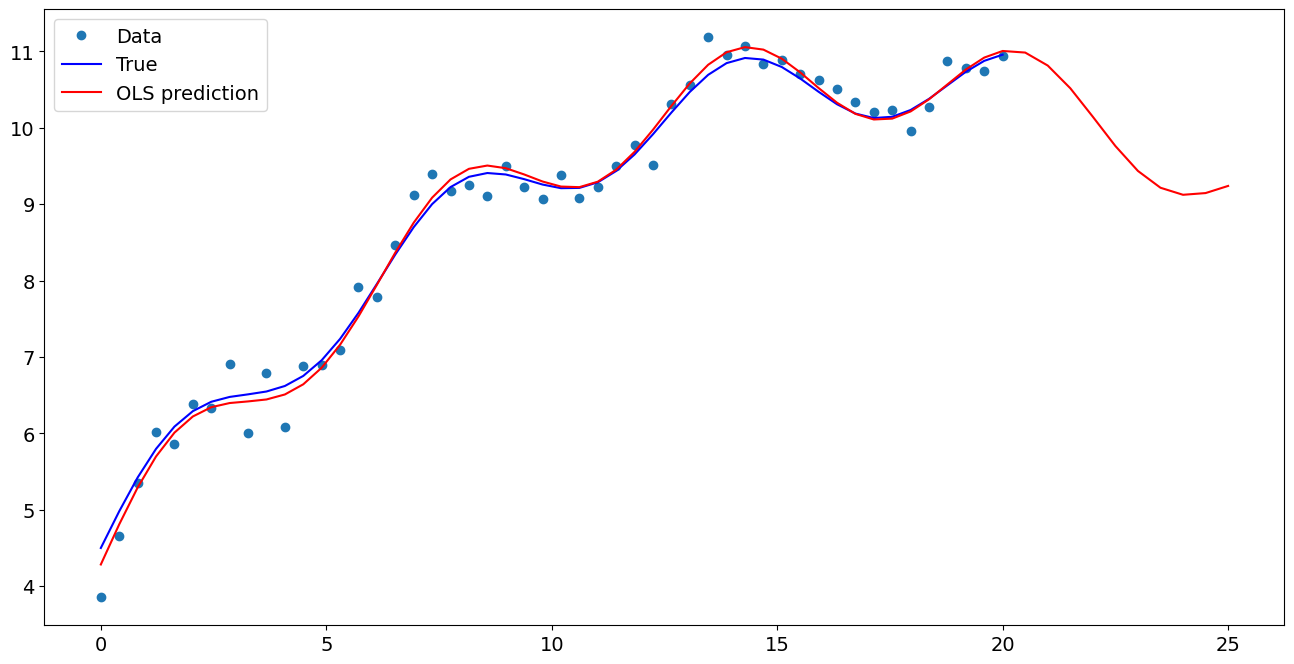

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.829100
x1                  0.528187
np.sin(x1)          0.566431
I((x1 - 5) ** 2)   -0.021801
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.983872
1    10.813872
2    10.516942
3    10.143704
4     9.760793
5     9.434544
6     9.214750
7     9.122472
8     9.144880
9     9.238399
dtype: float64